# MOVIE RATING PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import mean_squared_error,r2_score

# DATASET COLLECTION

In [3]:
df = pd.read_csv("Movies Dataset.csv", encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# DATA PREPROCESSING

In [4]:
df.shape

(15509, 10)

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.dropna(subset=["Rating"],inplace=True)

In [9]:
df.drop(columns=['Name'],inplace=True)

In [10]:
df.fillna({
    'Genre': 'Unknown',
    'Director': 'Unknown',
    'Actor 1': 'Unknown',
    'Actor 2': 'Unknown',
    'Actor 3': 'Unknown',
}, inplace=True)


In [11]:
# Remove commas from 'Votes' and convert to int
df['Votes']  = df['Votes'].astype(str).str.replace(',' , ' ')
df['Votes']= pd.to_numeric(df['Votes'],errors='coerce')

In [12]:
# Remove 'min' and convert Duration to int
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)') 
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')



In [13]:
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')  # Extract 4-digit year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [14]:
df['Votes'] .fillna(df['Votes'].median(),inplace=True)
df['Duration'].fillna(df['Duration'].median(),inplace=True)
df['Year'].fillna(df['Year'].median(),inplace=True)


C:\Users\sivas\AppData\Local\Temp\ipykernel_10696\983140109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'] .fillna(df['Votes'].median(),inplace=True)
C:\Users\sivas\AppData\Local\Temp\ipykernel_10696\983140109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [15]:
df.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
df.shape

(7919, 9)

In [17]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   int64  
 1   Duration  7919 non-null   float64
 2   Genre     7919 non-null   object 
 3   Rating    7919 non-null   float64
 4   Votes     7919 non-null   float64
 5   Director  7919 non-null   object 
 6   Actor 1   7919 non-null   object 
 7   Actor 2   7919 non-null   object 
 8   Actor 3   7919 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 618.7+ KB


# DATA ANALYSIS

In [19]:
genre_counts=df['Genre'].value_counts().reset_index()
genre_counts.columns=['Genre','Count']
top_n_genres=genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1177
1,"Drama, Romance",447
2,"Action, Crime, Drama",417
3,Action,417
4,"Drama, Family",291


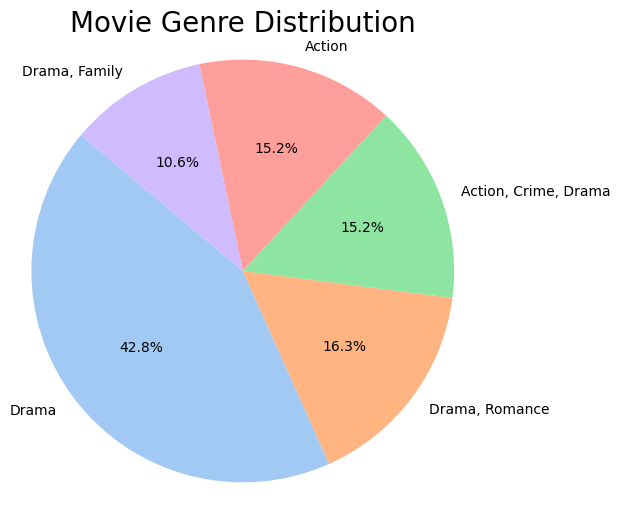

In [20]:
plt.figure(figsize=(6,6))
plt.pie(top_n_genres['Count'],labels=top_n_genres['Genre'],autopct='%1.1f%%',startangle=140,colors=sns.color_palette("pastel"))
plt.title("Movie Genre Distribution" , fontsize=20)
plt.axis('equal')
plt.show()

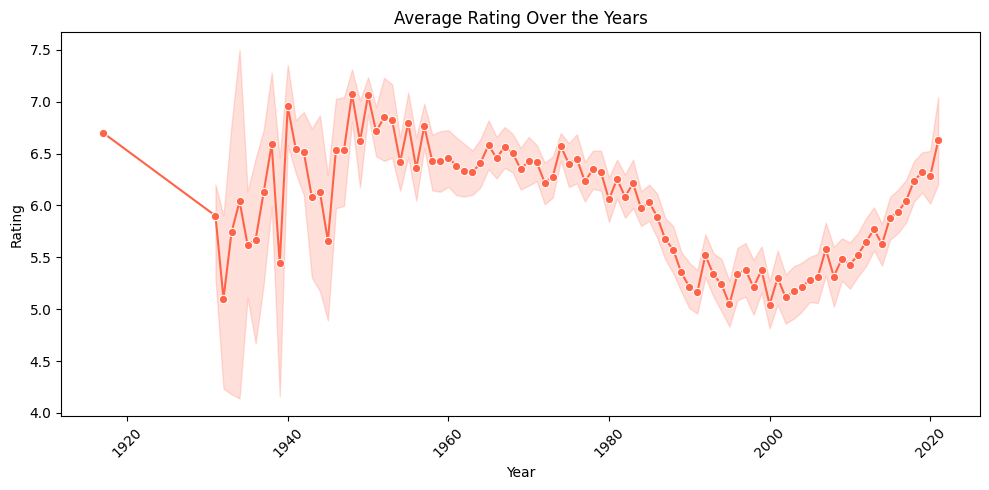

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Rating', data=df, marker='o', color='tomato')
plt.title("Average Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df['Genre']=df['Genre'].str.split(',')
genre_df=df.explode('Genre')


C:\Users\sivas\AppData\Local\Temp\ipykernel_10696\637921759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df,x='Genre',order=genre_df['Genre'].value_counts().index,palette='viridis')


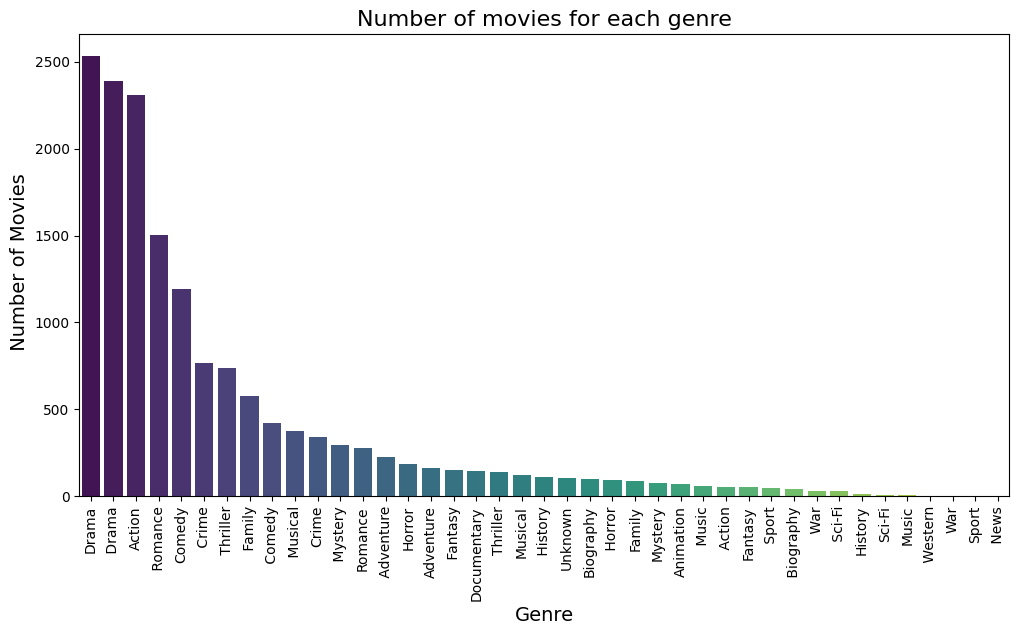

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=genre_df,x='Genre',order=genre_df['Genre'].value_counts().index,palette='viridis')
plt.title("Number of movies for each genre",fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel(" Number of Movies",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [24]:
avg_rating=df.groupby('Director')['Rating'].mean().reset_index()
avg_rating=avg_rating.sort_values(by='Rating', ascending=False)
dirctors=avg_rating.head(10)
dirctors

,Director,Rating
2385,Saif Ali Sayeed,10.0
2720,Sriram Raja,9.7
538,Bobby Kumar,9.6
363,Ashish Dubey,9.4
1611,Munni Pankaj,9.4
348,Arvind Pratap,9.4
2763,Suhrud Godbole,9.4
2003,Rahul Mallick,9.3
821,Gautam Joshi,9.3
3081,Vishwa Bhanu,9.3


C:\Users\sivas\AppData\Local\Temp\ipykernel_10696\2919096054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dirctors,x='Rating',y='Director',palette='viridis')


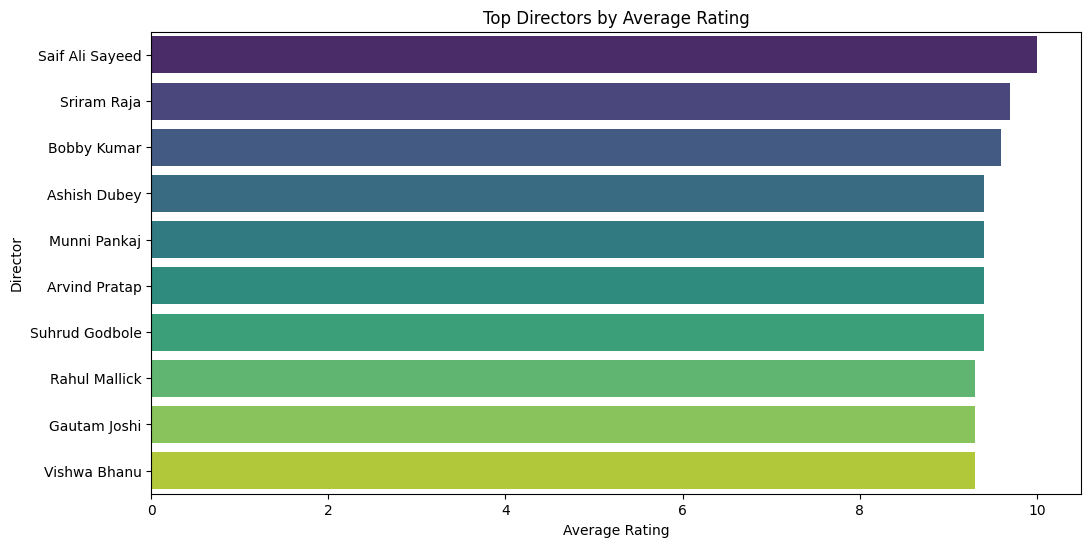

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=dirctors,x='Rating',y='Director',palette='viridis')
plt.title("Top Directors by Average Rating")
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

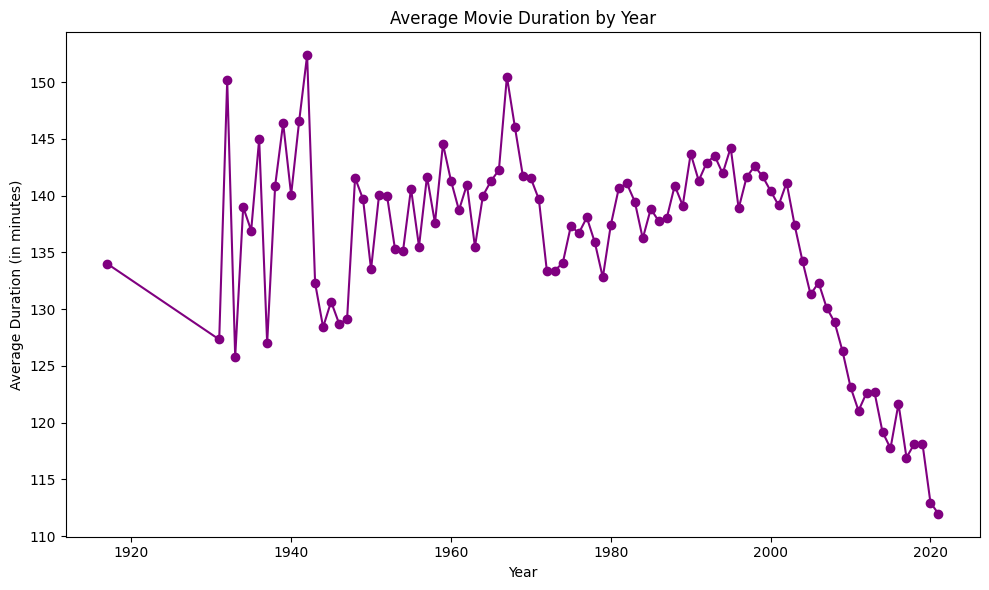

In [26]:


duration_by_year = df.groupby('Year')['Duration'].mean()

# Plot the line graph
plt.figure(figsize=(10,6))
plt.plot(duration_by_year.index, duration_by_year.values, marker='o', linestyle='-', color='purple')
plt.title('Average Movie Duration by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (in minutes)')
plt.tight_layout()
plt.show()


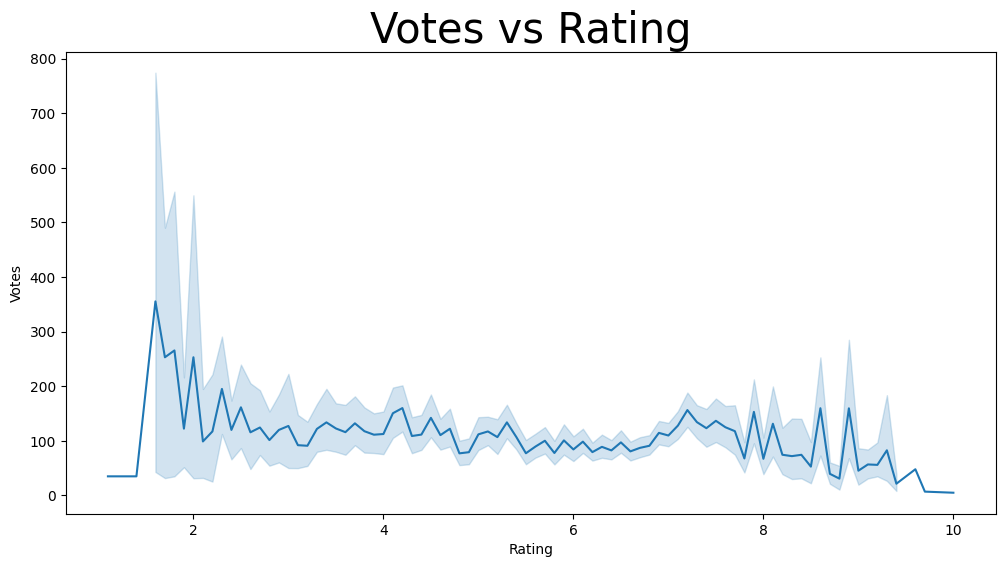

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x="Rating",y="Votes")
plt.title("Votes vs Rating",fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()

# ENCODING

In [28]:

categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_columns:
    df[col] = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [29]:

categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

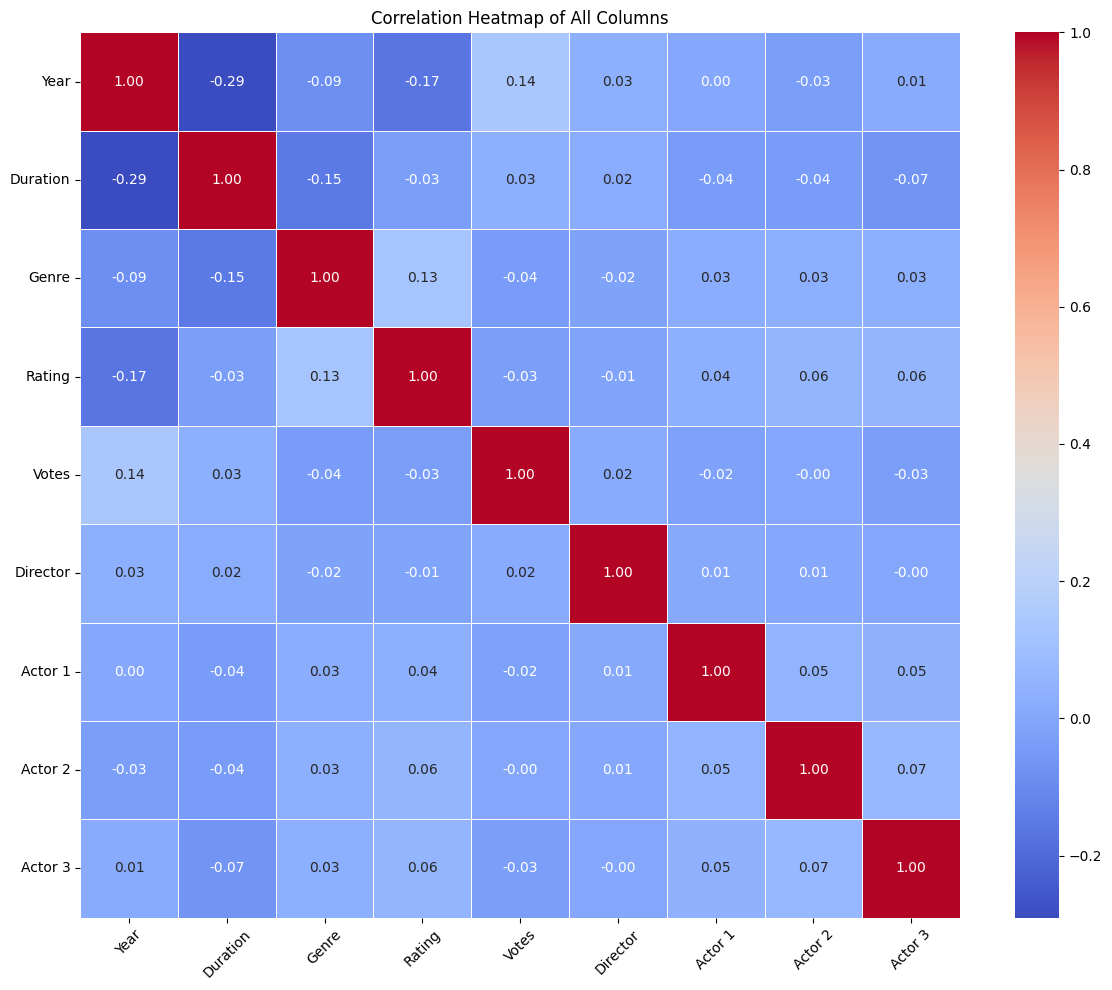

In [30]:
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Columns")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# MODEL TRAINING

In [31]:
#  Feature selection
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes', 'Duration', 'Year']
target = 'Rating'
X = df[features]
y = df[target]


In [32]:
features=X.columns.tolist()
features

['Genre',
 'Director',
 'Actor 1',
 'Actor 2',
 'Actor 3',
 'Votes',
 'Duration',
 'Year']

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)


# MODEL PERFORMANCE

In [35]:
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 1.314132661616162
R2 Score: 0.29315219512017954


# MODEL TESTING

In [37]:
 # Predict function using user input
def predict_from_user_input():
    print("\n Enter movie details below to predict IMDb rating:")
    genre = input("Genre: ")
    director = input("Director: ")
    actor1 = input("Actor 1: ")
    actor2 = input("Actor 2: ")
    actor3 = input("Actor 3: ")
    votes = int(input("Votes (number): "))
    duration = int(input("Duration (minutes): "))
    year = int(input("Year: "))




    # Prepare input dictionary
    input_dict = {
        'Genre': genre,
        'Director': director,
        'Actor 1': actor1,
        'Actor 2': actor2,
        'Actor 3': actor3,
        'Votes': votes,
        'Duration': duration,
        'Year': year
    }
    print(input_dict)

    # Encode categorical values
    for col in categorical_columns:
        if input_dict[col] not in label_encoders[col].classes_:
            # Handle unseen values by adding 'Unknown'
            label_encoders[col].classes_ = np.append(label_encoders[col].classes_, 'Unknown')
            input_dict[col] = 'Unknown'
        input_dict[col] = label_encoders[col].transform([input_dict[col]])[0]

    # Prepare dataframe for prediction
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    print(f"\n Predicted IMDb Rating: {round(prediction, 2)}")

# Call the prediction function
predict_from_user_input()



 Enter movie details below to predict IMDb rating:
{'Genre': 'Action', 'Director': 'Miller', 'Actor 1': 'Tom', 'Actor 2': 'Charlize', 'Actor 3': 'Nicholas', 'Votes': 980000, 'Duration': 120, 'Year': 2015}

 Predicted IMDb Rating: 5.51
